In [1]:
fn = '/user_data/mmhender/features/sketch_tokens_TEST/S1_features_240.h5py'

In [2]:
import numpy as np
import h5py


In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import scipy.stats
import pandas as pd
from scipy.io import loadmat
from utils import default_paths, prf_utils, nsd_utils
from model_fitting import initialize_fitting
from feature_extraction import fwrf_features

In [11]:
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
feature_ims = clust['clusters']['clusters'][0][0]
feature_ims = np.moveaxis(feature_ims, [0,1,2], [1,0,2])

In [27]:
clust['clusters'][0][0][0].shape

(869183, 1)

In [38]:
len(clust['clusters'][0][0])

6

In [63]:
[np.shape(clust['clusters'][0][0][ii]) for ii in range(6)]

[(869183, 1),
 (869183, 1),
 (869183, 1),
 (869183, 1),
 (869183, 1),
 (31, 31, 150)]

In [57]:
clust['clusters']['clusterId'][0][0].shape

(869183, 1)

In [68]:
cluster_ids = clust['clusters']['clusterId'][0][0]
cluster_ids

array([[  1],
       [  1],
       [  1],
       ...,
       [500],
       [500],
       [500]], dtype=int32)

In [69]:
ground_truth_ids = clust['clusters']['gtId'][0][0]
ground_truth_ids

array([[4],
       [5],
       [1],
       ...,
       [5],
       [4],
       [3]], dtype=int32)

In [71]:
patches = clust['clusters']['patches'][0][0]
ptches

KeyError: 'patches'

In [70]:
np.unique(ground_truth_ids)

array([1, 2, 3, 4, 5], dtype=int32)

In [58]:
clust['clusters']['x'][0][0].shape

(869183, 1)

In [59]:
clust['clusters']['y'][0][0].shape

(869183, 1)

In [61]:
clust['clusters']['imId'][0][0].shape

(869183, 1)

In [61]:
clust['clusters']['gtId'][0][0].shape

(869183, 1)

In [62]:
clust['clusters']['clusters'][0][0].shape

(31, 31, 150)

In [54]:
869183/150

5794.553333333333

In [50]:
clust['clusters']['clusters'][0][0].shape

(31, 31, 150)

In [46]:
869183/640

1358.0984375

In [4]:
with h5py.File(fn, 'r') as data_set:
    keyname = list(data_set.keys())[0]
    values = np.copy(data_set[keyname])
    data_set.close()    
values.shape

(151, 240, 240, 10)

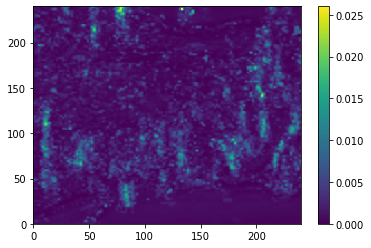

In [6]:
import matplotlib.pyplot as plt
plt.figure();
plt.pcolormesh(values[0,:,:,0])
plt.colorbar()

In [9]:
chansums = np.sum(values, axis=0)
np.max(np.abs(chansums-1))

1.182153937406838e-06